In [1]:
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd


from chester.plotting.cplot import *

# data_paths = ['data/autobot/0730_PushSpread_train_policy/']
data_paths = ['data/autobot/0802_PushSpread_train_policy/']
exps_data, plottable_keys, distinct_params = reload_data(data_paths)

/home/xingyu/Projects/PlasticineLab
['data/autobot/0802_PushSpread_train_policy/']
finished walking exp folders
Reading data/autobot/0802_PushSpread_train_policy/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0802_PushSpread_train_policy/progress.csv'
Reading data/autobot/0802_PushSpread_train_policy/0802_PushSpread_train_policy/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0802_PushSpread_train_policy/0802_PushSpread_train_policy/progress.csv'
Reading data/autobot/0802_PushSpread_train_policy/0802_PushSpread_train_policy/0802_PushSpread_train_policy_2021_08_02_16_03_19_0003/progress.csv
Reading data/autobot/0802_PushSpread_train_policy/0802_PushSpread_train_policy/0802_PushSpread_train_policy_2021_08_02_16_03_19_0003/log/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0802_PushSpread_train_policy/0802_PushSpread_train_policy/0802_PushSpread_train_policy_2021_08_02_16_03_19_0003/log/progress.csv'
Reading data/autobot/0802_PushSpread_tr

here


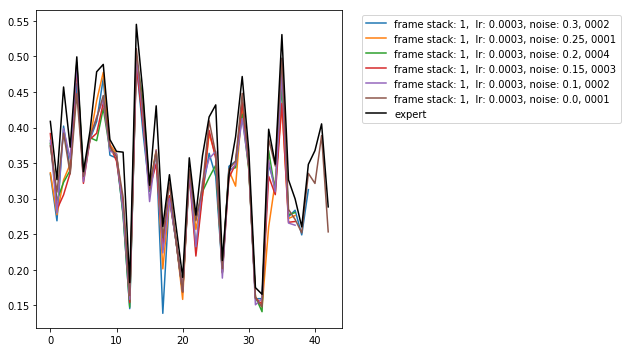

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def custom_series_splitter(x):
    params = x['flat_params']
    
    frame_stack = params['frame_stack']
    hindsight_goal_ratio = params['hindsight_goal_ratio']
    lr = params['il_lr']
    img_mode = params['img_mode']
    if img_mode =='d':
        return 'filtered'
    if hindsight_goal_ratio == 1.:
        return 'filtered'
    exp_id = params['exp_name'][-4:]
    if hindsight_goal_ratio >0 or lr==1e-3:
        return 'filtered'
    if 'obs_noise' in params:
        obs_noise = params['obs_noise']
    else:
        obs_noise = 0.
    if frame_stack > 1:
        return 'filtered'
    return f"frame stack: {frame_stack},  lr: {lr}, noise: {obs_noise}, {exp_id}"

group_selectors, group_legends = get_group_selectors(exps_data, custom_series_splitter)
print('here')

# keys = ['agent_iou', 'demo_iou']
key = 'agent_iou'
fig = plt.figure(figsize=(5,5))
for idx, (selector, legend) in enumerate(zip(group_selectors, group_legends)):
    if legend == 'filtered':
        continue
    y = [exp.progress.get(key, np.array([np.nan])) for exp in selector.extract()][0]
    plt.plot(list(range(len(y))), y, label=legend)

key = 'demo_iou'
y = [exp.progress.get(key, np.array([np.nan])) for exp in group_selectors[5].extract()][0]
plt.plot(list(range(len(y))), y, label='expert', color='black')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./data/plots/0718_frame_stack.png', bbox_inches="tight")
plt.show()